In [1]:
from utils import cp_detector as cpd
from utils import data_generation as gen
from utils import statistic_calculation as stat
from utils import threshold_calculation as th

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
dataset_parameters = {
    "dataset_size": 500,
    "seq_len": 101,
    "d": 10,
    "p": 5,
    "distribution": "normal",
    "k": 10,
    "cp": None,
    "nu": 10
}

In [3]:
import torch
import torch.nn as nn

data_with_cp, data_without_cp, cp_idxs = gen.generate_data(**dataset_parameters)

### with Layer Norm
layer_norm = nn.LayerNorm(dataset_parameters["d"]).float()
data_with_cp_ln = layer_norm(torch.from_numpy(data_with_cp).float()).detach().numpy()
data_without_cp_ln = (
    layer_norm(torch.from_numpy(data_without_cp).float()).detach().numpy()
)


z_with = stat.calculate_z(data_with_cp)
z_without = stat.calculate_z(data_without_cp)
z_with_ln = stat.calculate_z(data_with_cp_ln)
z_without_ln = stat.calculate_z(data_without_cp_ln)

l_with = stat.calculate_l_lin(z_with, layer_norm=False)
l_without = stat.calculate_l_lin(z_without, layer_norm=False)

l_with_ln = stat.calculate_l_lin(z_with_ln, layer_norm=True)
l_without_ln = stat.calculate_l_lin(z_without_ln, layer_norm=True)

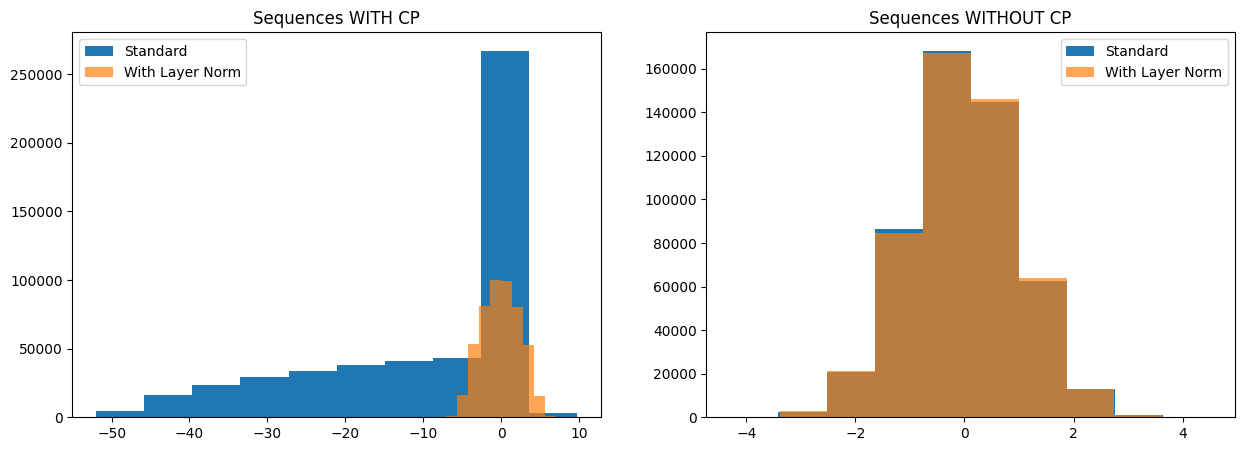

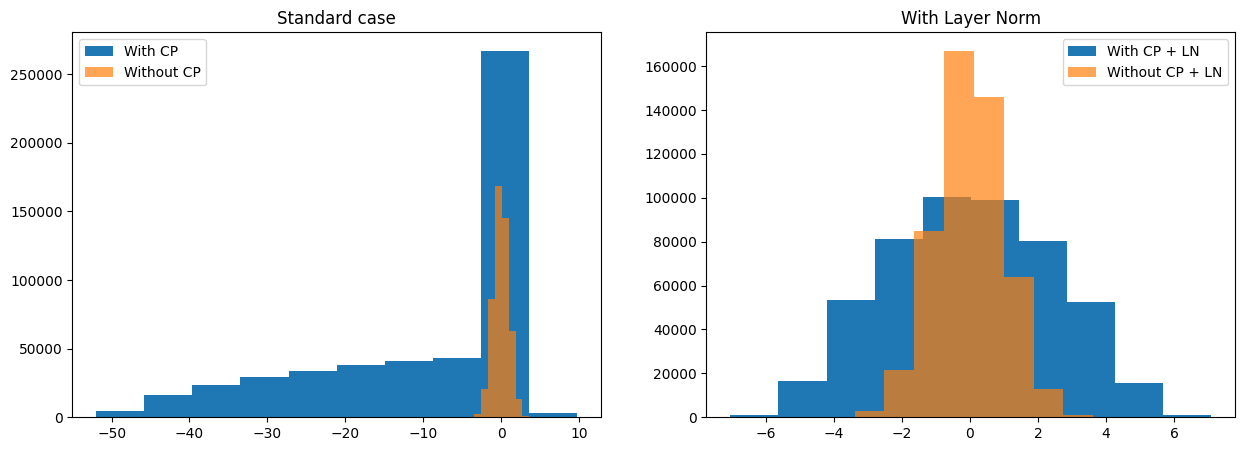

In [4]:
# z-statistic
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title("Sequences WITH CP")
ax1.hist(z_with.flatten(), label="Standard")
ax1.hist(z_with_ln.flatten(), alpha=0.7, label="With Layer Norm")
ax1.legend()

ax2.set_title("Sequences WITHOUT CP")
ax2.hist(z_without.flatten(), label="Standard")
ax2.hist(z_without_ln.flatten(), alpha=0.7, label="With Layer Norm")
ax2.legend()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title("Standard case")
ax1.hist(z_with.flatten(), label="With CP")
ax1.hist(z_without.flatten(), alpha=0.7, label="Without CP")
ax1.legend()

ax2.set_title("With Layer Norm")
ax2.hist(z_with_ln.flatten(), label="With CP + LN")
ax2.hist(z_without_ln.flatten(), alpha=0.7, label="Without CP + LN")
ax2.legend();

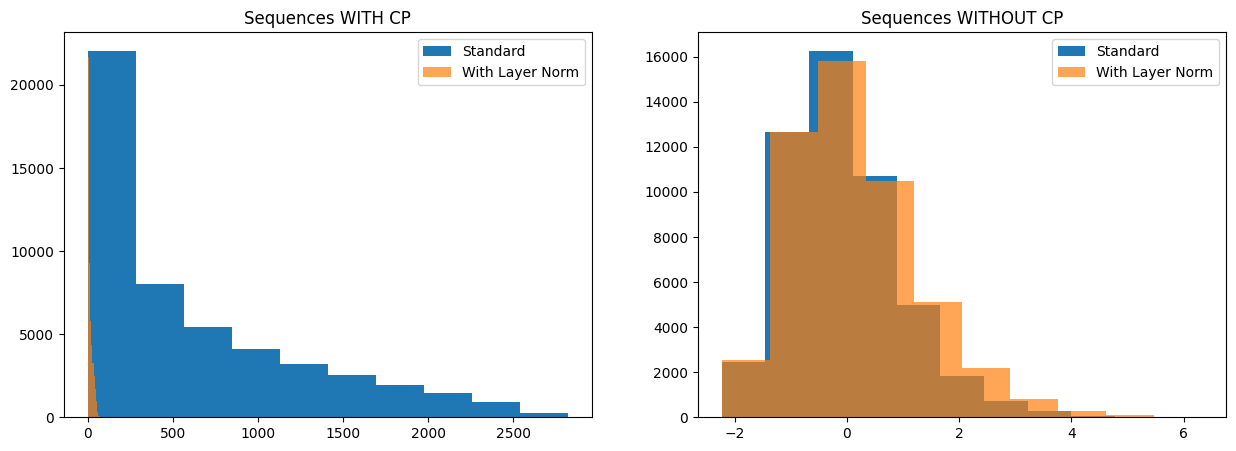

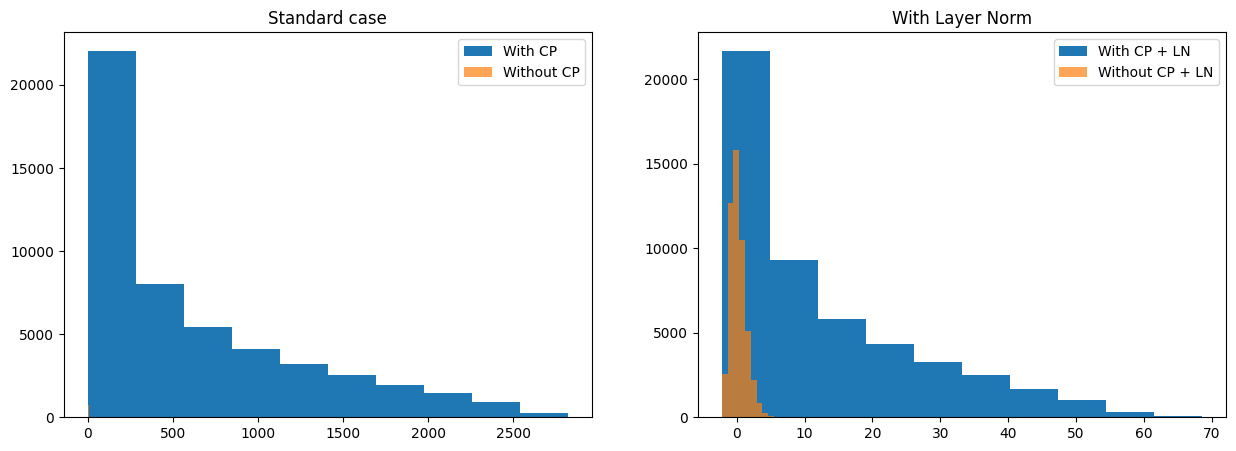

In [5]:
# L-statistic
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title("Sequences WITH CP")
ax1.hist(l_with.flatten(), label="Standard")
ax1.hist(l_with_ln.flatten(), alpha=0.7, label="With Layer Norm")
ax1.legend()

ax2.set_title("Sequences WITHOUT CP")
ax2.hist(l_without.flatten(), label="Standard")
ax2.hist(l_without_ln.flatten(), alpha=0.7, label="With Layer Norm")
ax2.legend()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title("Standard case")
ax1.hist(l_with.flatten(), label="With CP")
ax1.hist(l_without.flatten(), alpha=0.7, label="Without CP")
ax1.legend()

ax2.set_title("With Layer Norm")
ax2.hist(l_with_ln.flatten(), label="With CP + LN")
ax2.hist(l_without_ln.flatten(), alpha=0.7, label="Without CP + LN")
ax2.legend();

In [136]:
lin_stat_alpha = {}
lin_stat_alpha_ln = {}
lin_stat_beta = {}
lin_stat_beta_ln = {}

dataset_parameters = {
    "dataset_size": 500,
    "seq_len": 101,
    "d": 10,
    "p": 5,
    "distribution": "normal",
    "k": 10,
    "cp": None,
    "nu": 10
}

cp_parameters = {
    "alpha": 0.05,
    "scan": False,
    "data_based": False,
    "ln": False
}

for d in range(10, 1000, 50):
    print(d)
    dataset_parameters["d"] = d
    (fn, fp), (fn_ln, fp_ln) = cpd.cpd_with_ln_compare(
        dataset_parameters, cp_parameters, data_type="normal"
    )
    lin_stat_alpha[d] = fp
    lin_stat_alpha_ln[d] = fp_ln
    lin_stat_beta[d] = fn
    lin_stat_beta_ln[d] = fn_ln

100
0.0 1.0
350


KeyboardInterrupt: 

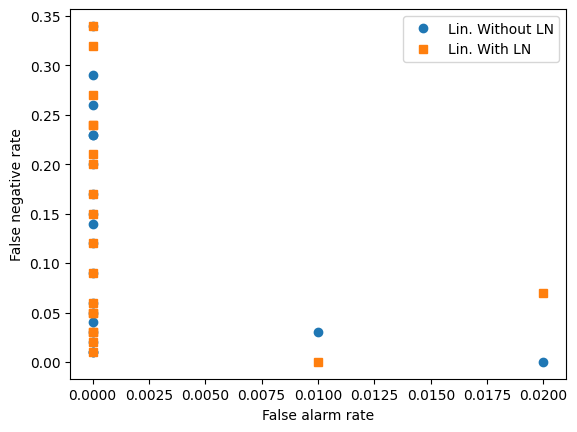

In [10]:
plt.plot(
    [value for value in lin_stat_alpha.values()],
    [value for value in lin_stat_beta.values()],
    "o",
    label="Lin. Without LN",
)

plt.plot(
    [value for value in lin_stat_alpha_ln.values()],
    [value for value in lin_stat_beta_ln.values()],
    "s",
    label="Lin. With LN",
)

plt.xlabel("False alarm rate")
plt.ylabel("False negative rate")
plt.legend()

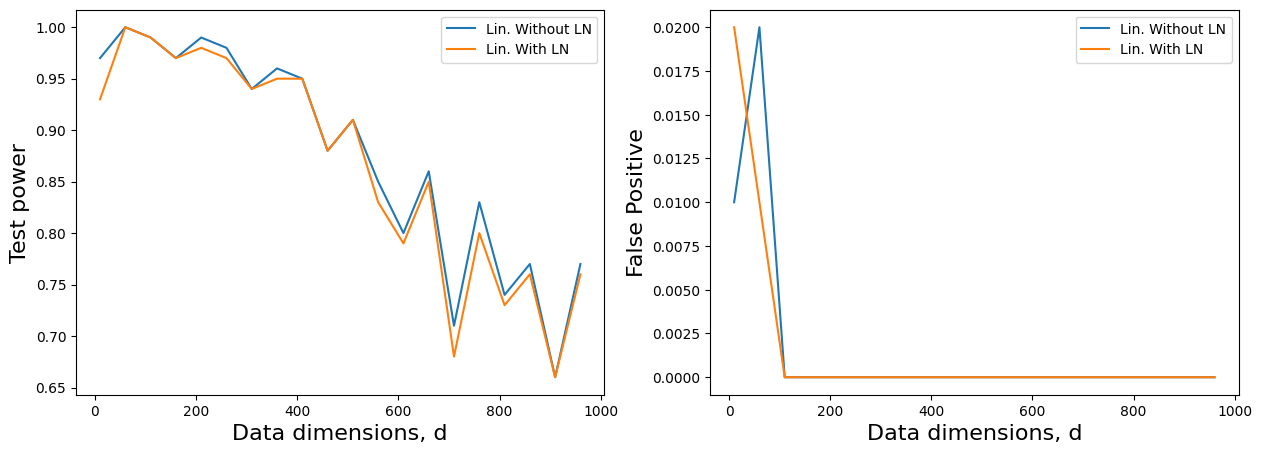

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(
    [key for key in lin_stat_beta.keys()],
    [1 - value for value in lin_stat_beta.values()],
    label="Lin. Without LN",
)

ax1.plot(
    [key for key in lin_stat_beta_ln.keys()],
    [1 - value for value in lin_stat_beta_ln.values()],
    label="Lin. With LN",
)

ax1.set_xlabel("Data dimensions, d", fontsize=16)
ax1.set_ylabel("Test power", fontsize=16)
ax1.legend()

ax2.plot(
    [key for key in lin_stat_beta.keys()],
    [value for value in lin_stat_alpha.values()],
    label="Lin. Without LN",
)

ax2.plot(
    [key for key in lin_stat_beta_ln.keys()],
    [value for value in lin_stat_alpha_ln.values()],
    label="Lin. With LN",
)

ax2.set_xlabel("Data dimensions, d", fontsize=16)
ax2.set_ylabel("False Positive", fontsize=16)
plt.legend()